In [17]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Admin\Desktop\Superstore.csv", encoding='latin1')


In [18]:
print(df)

      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2013-152156  09-11-2013  12-11-2013    Second Class   
1          2  CA-2013-152156  09-11-2013  12-11-2013    Second Class   
2          3  CA-2013-138688  13-06-2013  17-06-2013    Second Class   
3          4  US-2012-108966  11-10-2012  18-10-2012  Standard Class   
4          5  US-2012-108966  11-10-2012  18-10-2012  Standard Class   
...      ...             ...         ...         ...             ...   
9989    9990  CA-2011-110422  22-01-2011  24-01-2011    Second Class   
9990    9991  CA-2014-121258  27-02-2014  04-03-2014  Standard Class   
9991    9992  CA-2014-121258  27-02-2014  04-03-2014  Standard Class   
9992    9993  CA-2014-121258  27-02-2014  04-03-2014  Standard Class   
9993    9994  CA-2014-119914  05-05-2014  10-05-2014    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United 

In [19]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [20]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [21]:
print(df.isnull().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [23]:
print("Duplicate rows:", df.duplicated().sum())


Duplicate rows: 0


In [29]:
total_sales = df['Sales'].sum()
print(total_sales)

2297200.8603


In [30]:
total_profit = df['Profit'].sum()
print(total_profit)

286397.0217


In [31]:
sales_by_region = df.groupby("Region")["Sales"].sum()
print(sales_by_region)

Region
Central    501239.8908
East       678781.2400
South      391721.9050
West       725457.8245
Name: Sales, dtype: float64


In [32]:
sales_by_category = df.groupby("Category")["Sales"].sum()
print(sales_by_category)

Category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: Sales, dtype: float64


In [35]:
profit_by_category = df.groupby("Category")["Profit"].sum()
print(profit_by_category)

Category
Furniture           18451.2728
Office Supplies    122490.8008
Technology         145454.9481
Name: Profit, dtype: float64


In [39]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, errors='coerce')
print(df["Order Date"].head())

0   2013-11-09
1   2013-11-09
2   2013-06-13
3   2012-10-11
4   2012-10-11
Name: Order Date, dtype: datetime64[ns]


In [43]:
df['MonthYear'] = df['Order Date'].dt.strftime('%b %Y')
print(df['MonthYear'].head())


0    Nov 2013
1    Nov 2013
2    Jun 2013
3    Oct 2012
4    Oct 2012
Name: MonthYear, dtype: object


In [47]:
top_5_products_sold = df.groupby('Product Name')[['Sales','Profit']].sum().sort_values(by='Profit', ascending = False).head(5)
print(top_5_products_sold)

                                                        Sales      Profit
Product Name                                                             
Canon imageCLASS 2200 Advanced Copier               61599.824  25199.9280
Fellowes PB500 Electric Punch Plastic Comb Bind...  27453.384   7753.0390
Hewlett Packard LaserJet 3310 Copier                18839.686   6983.8836
Canon PC1060 Personal Laser Copier                  11619.834   4570.9347
HP Designjet T520 Inkjet Large Format Printer -...  18374.895   4094.9766


In [53]:
top_5_regions_sales = df.groupby('Region')[['Sales','Profit']].sum().sort_values(by= 'Sales', ascending = False).head(5)
print(top_5_regions_sales)


               Sales       Profit
Region                           
West     725457.8245  108418.4489
East     678781.2400   91522.7800
Central  501239.8908   39706.3625
South    391721.9050   46749.4303


In [54]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   object        
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

<Figure size 600x400 with 0 Axes>

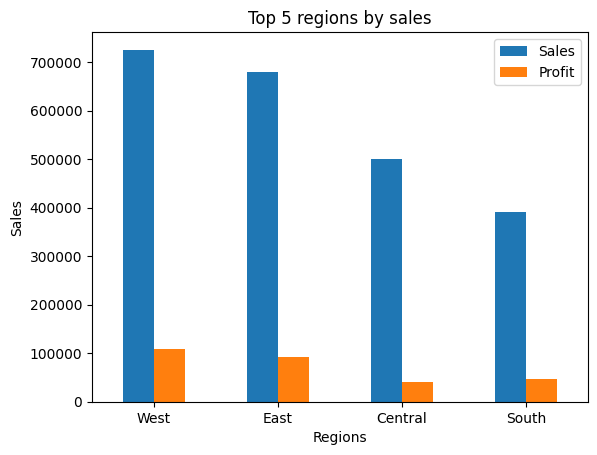

In [80]:
import matplotlib.pyplot as plt
plt.figure(figsize = (6,4))
top_5_regions_sales.plot(kind = 'bar')
plt.title("Top 5 regions by sales")
plt.xlabel("Regions")
plt.xticks(rotation=0)
plt.ylabel("Sales")
plt.show()

In [74]:
top_5_category_sales = df.groupby('Category')['Sales'].sum()
print(top_5_category_sales)



Category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: Sales, dtype: float64


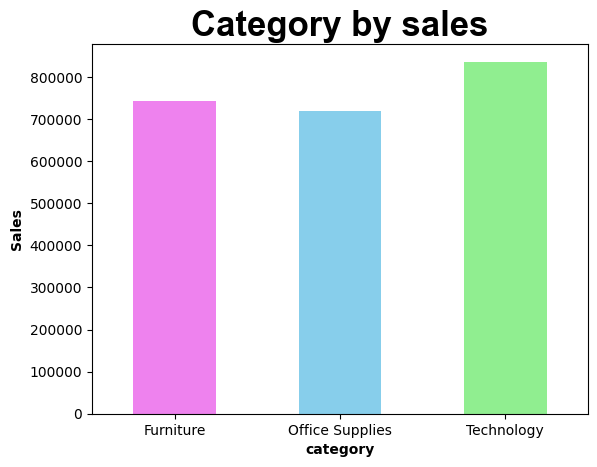

In [82]:
top_5_category_sales.plot(kind ='bar', color = ['violet', 'skyblue', 'lightgreen'])
plt.title("Category by sales", fontfamily='Arial', fontsize = 25, fontweight = 'bold')
plt.xlabel("category", fontweight='bold')
plt.ylabel("Sales", fontweight='bold')
plt.xticks(rotation=0)
plt.show()